#### This case requires to develop a customer segmentation to define marketing strategy. 
####  The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

#### CUSTID : Identification of Credit Card holder (Categorical)
#### BALANCE : Balance amount left in their account to make purchases (
#### BALANCEFREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)
#### PURCHASES : Amount of purchases made from account
##### ONEOFFPURCHASES : Maximum purchase amount done in one-go
#### INSTALLMENTSPURCHASES : Amount of purchase done in installment
#### CASHADVANCE : Cash in advance given by the user
#### PURCHASESFREQUENCY : How frequently the Purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)
#### ONEOFFPURCHASESFREQUENCY : How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not frequently purchased)
##### PURCHASESINSTALLMENTSFREQUENCY : How frequently purchases in installments are being done (1 = frequently done, 0 = not frequently done)
#### CASHADVANCEFREQUENCY : How frequently the cash in advance being paid
#### CASHADVANCETRX : Number of Transactions made with "Cash in Advanced"
#### PURCHASESTRX : Numbe of purchase transactions made
#### CREDITLIMIT : Limit of Credit Card for user
#### PAYMENTS : Amount of Payment done by user
#### MINIMUM_PAYMENTS : Minimum amount of payments made by user
#### PRCFULLPAYMENT : Percent of full payment paid by user
#### TENURE : Tenure of credit card service for user

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
    

In [2]:
cc_df = pd.read_csv("CC clustering dataset.csv",index_col = "CUST_ID")

In [3]:
cc_df.head()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
CUST_ID,,,,,,,,,,,,,,,,,
C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
cc_df.shape

(8950, 17)

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8950 entries, C10001 to C19190
Data columns (total 17 columns):
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS                    8637 non-null float64
PRC_FULL_PAYMENT         

In [6]:
cc_df.isnull().any()

BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

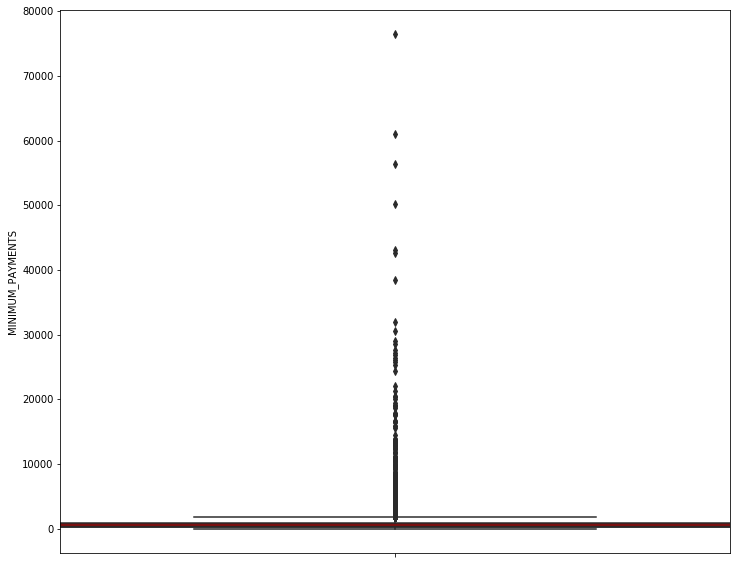

In [7]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "MINIMUM_PAYMENTS",data = cc_df,orient = "v",width = 1.2,color = "darkred")

#### Since there are  many outliers,so its good to impute the missing values using Median 

In [8]:
cc_df["MINIMUM_PAYMENTS"].describe()

count     8637.000000
mean       864.206542
std       2372.446607
min          0.019163
25%        169.123707
50%        312.343947
75%        825.485459
max      76406.207520
Name: MINIMUM_PAYMENTS, dtype: float64

In [9]:
# imputing missing values
cc_df["MINIMUM_PAYMENTS"].fillna(cc_df["MINIMUM_PAYMENTS"].median(),inplace = True)

In [10]:
cc_df.isnull().any().sum()

1

In [11]:
cc_df["CREDIT_LIMIT"].describe()

count     8949.000000
mean      4494.449450
std       3638.815725
min         50.000000
25%       1600.000000
50%       3000.000000
75%       6500.000000
max      30000.000000
Name: CREDIT_LIMIT, dtype: float64

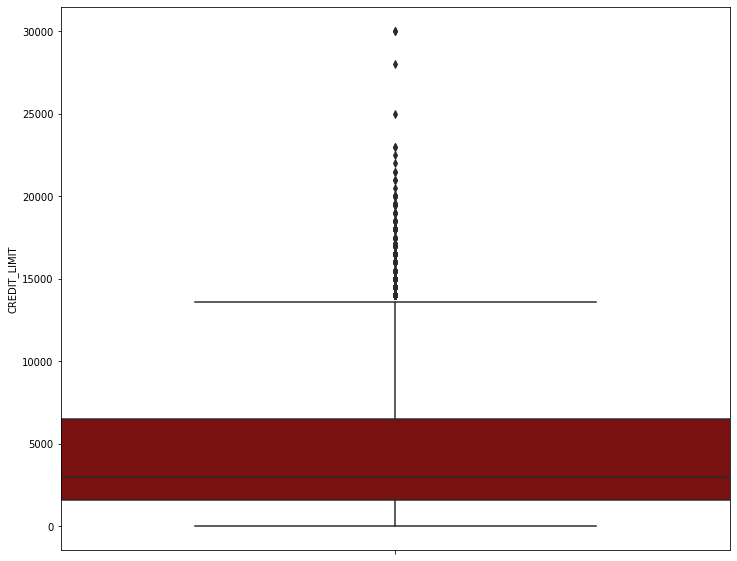

In [12]:
plt.figure(figsize = (12,10))
sns.boxplot(x = "CREDIT_LIMIT",data = cc_df,orient = "v",width = 1.2,color = "darkred")

In [13]:
# imputing missing values for credit limit column
cc_df["CREDIT_LIMIT"].fillna(cc_df["CREDIT_LIMIT"].median(),inplace = True)

In [14]:
cc_df.isnull().any().sum()

0

In [15]:
cor = cc_df.corr()

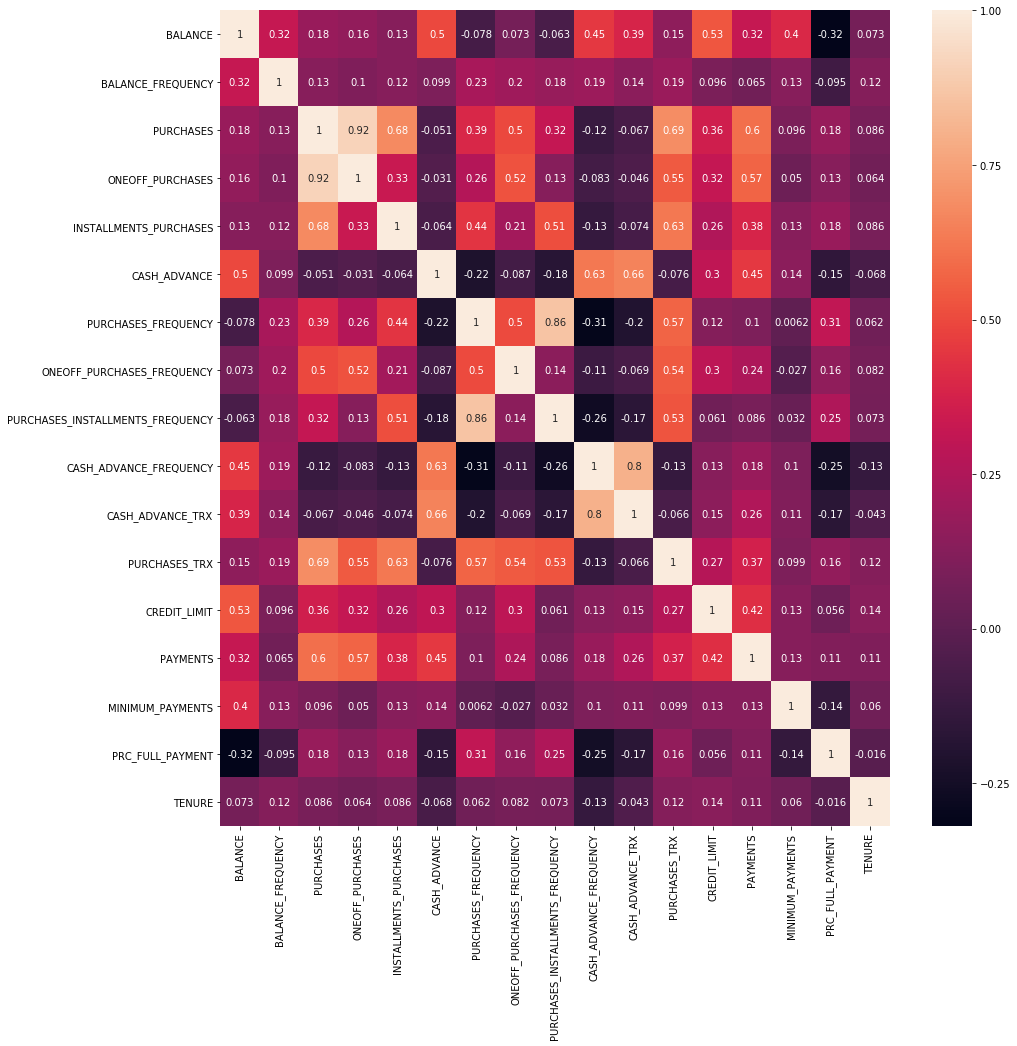

In [16]:
plt.figure(figsize = (15,15))
sns.heatmap(cor,annot = True)

#### Features "PURCHASES" and " ONEOFF_PURCHASES" are 92% related to each other. This can imply that more amount of purchase from the account can lead to more amount of OneOFFPurchase.
#### features "PURCHASES_FREQUENCY "and "PURCHASES_INSTALLMENTS_FREQUENCY" are 86% i.e the more the purchase frequency ,the higher the purchse insatallment freq.
#### The Higher the cash advance freq. ,the higher the cash advance trx

### Scaling down the features 

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_cc_df = ss.fit_transform(cc_df)

In [18]:
scaled_cc_df.shape

(8950, 17)

### Dimensionbility Reduction

##### Using PCA

##### To check how many components to conside when doing PCA ,i am going to check explained_ variance_ ratio ( this is the variance which is explained by the Principal components) .This value is set before hand. In this case i am going to take 95% variance.

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca_scaled = pca.fit(scaled_cc_df)

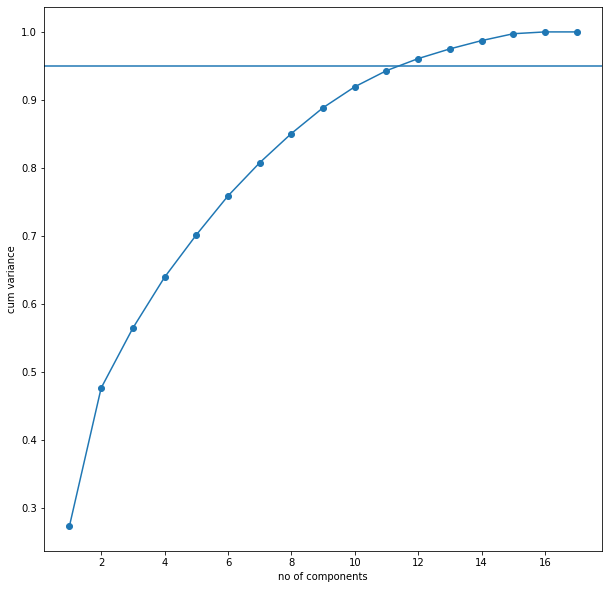

In [21]:
plt.figure(figsize = (10,10))
x = np.arange(1,18,step = 1)
y = np.cumsum(pca_scaled.explained_variance_ratio_)# cumulative variance
plt.plot(x,y,marker = 'o')
plt.xlabel("no of components")
plt.ylabel("cum variance")

plt.axhline(y = 0.95)

plt.show()


#### Here we can see for explaining 95% variance we will require approx 11 or 12 components.

In [22]:
pc = PCA(n_components = 12)
pc_scaled_df = pc.fit(scaled_cc_df)

In [23]:
reduced_scaled_df = pc.transform(scaled_cc_df)

In [24]:
reduced_scaled_df.shape

(8950, 12)

### Modelling

#### Using K-means clustering 

 #### To find the optimal k(cluster) in K-means clustering ,i am going to check within cluster sum of square distance(or inertia).

In [25]:
from sklearn.cluster import KMeans

In [26]:
sum_of_squared_dist = []
for k in range(1,14):
    kmean = KMeans(n_clusters = k)
    kmean = kmean.fit(reduced_scaled_df)
    sum_of_squared_dist.append(kmean.inertia_)
    
    

In [27]:
#sum_of_squared_dist

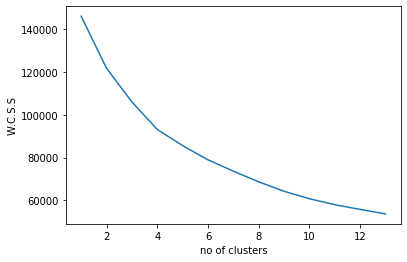

In [28]:
x  = np.arange(1,14,1)
y = sum_of_squared_dist

plt.plot(x,y)
plt.xlabel("no of clusters")
plt.ylabel("W.C.S.S")
plt.show()


#### k = 4 is looking kind of optimal clusters

In [29]:
Kmean = KMeans(n_clusters = 4)
Kmean = Kmean.fit(reduced_scaled_df)


In [30]:
pred = Kmean.labels_

In [31]:
#Kmean.cluster_centers_

In [32]:
#Kmean.inertia_

#### Reducing the no of feature to plot clusters in 2D 

In [33]:
pca = PCA(n_components= 2)
pca.fit(reduced_scaled_df)

PCA(n_components=2)

In [34]:
pca_transform = pca.transform(reduced_scaled_df)

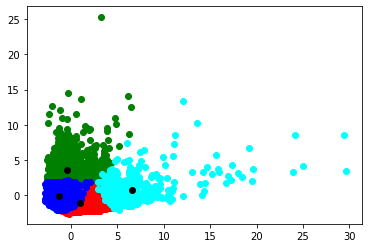

In [35]:
plt.scatter(pca_transform[pred==0,0],pca_transform[pred==0,1],c= "red",label  ="Cluster 1")
plt.scatter(pca_transform[pred==1,0],pca_transform[pred==1,1],c= "green",label  ="Cluster 2")
plt.scatter(pca_transform[pred==2,0],pca_transform[pred==2,1],c= "cyan",label  ="Cluster 3")
plt.scatter(pca_transform[pred==3,0],pca_transform[pred==3,1],c= "blue",label  ="Cluster 4")



plt.scatter(Kmean.cluster_centers_[:,0],Kmean.cluster_centers_[:,1],c = "black")


